# 画像処理

In [1]:
%matplotlib inline

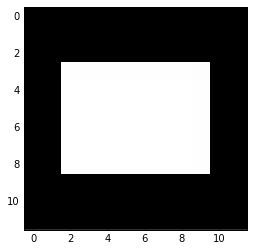

In [2]:
# 画像を読み込んで表示しなさい
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("test.bmp")

plt.imshow( img, interpolation="None" )
plt.show()

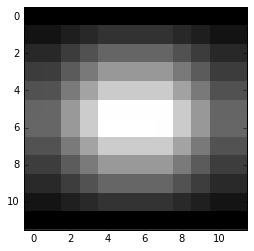

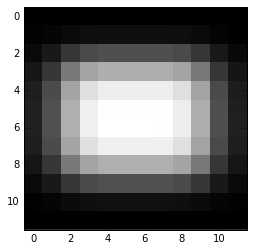

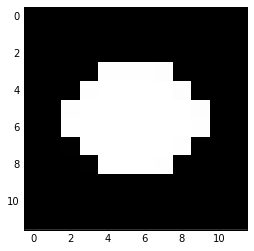

In [3]:
# 画像を平滑化しなさい
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("test.bmp")

img2 = cv2.blur(img,(5,5))
plt.imshow( img2, interpolation="None" )

img2 = cv2.GaussianBlur(img,(5,5), 0)
plt.figure()
plt.imshow( img2, interpolation="None" )

img2 = cv2.medianBlur(img,5)
plt.figure()
plt.imshow( img2, interpolation="None" )

plt.show()

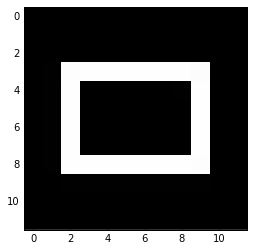

In [4]:
# エッジを抽出をしなさい
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("test.bmp")

img2 = cv2.Laplacian(img, cv2.CV_64F)

plt.imshow( img2, interpolation="None" )
plt.show()

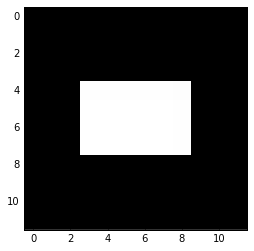

In [5]:
# 収縮処理をしなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test.bmp")

kernel = np.ones((3,3),np.uint8)
img2 = cv2.erode(img,kernel,iterations = 1)

plt.imshow( img2, interpolation="None" )
plt.show()

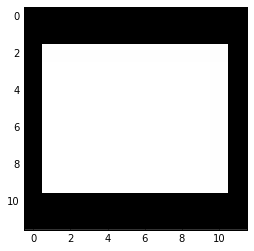

In [6]:
# 膨張処理をしなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test.bmp")

kernel = np.ones((3,3),np.uint8)
img2 = cv2.dilate(img,kernel,iterations = 1)

plt.imshow( img2, interpolation="None" )
plt.show()

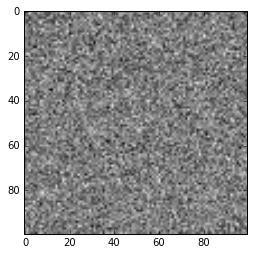

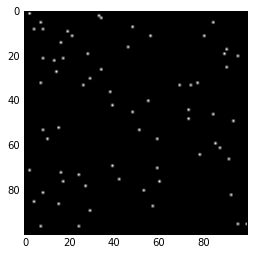

In [7]:
# 画像を二値化しなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test2.bmp", 0 )

img2 = np.zeros( img.shape )
img2 = 255 * (img>200)

plt.imshow(img, cmap="gray")

plt.figure()
plt.imshow(img2, cmap="gray")
plt.show()

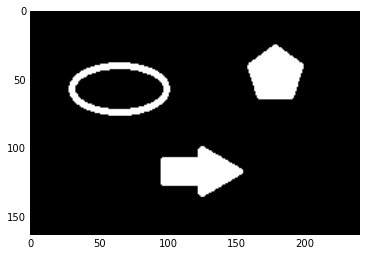

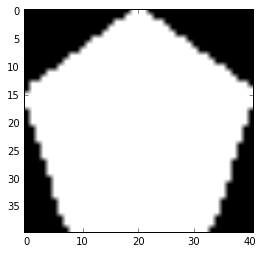

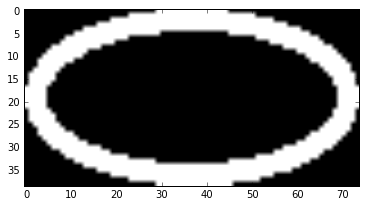

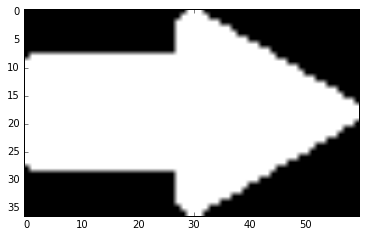

In [8]:
# 二値画像に対してラベリング処理をして画像中から図形を抽出しなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test4.bmp", 0)

nlabels, labelimg, contours, centers = cv2.connectedComponentsWithStats(img)

plt.imshow(img, cmap="gray")

for x, y, w, h, _ in contours[1:]:
    shape = img[y:y+h, x:x+w]
    plt.figure()
    plt.imshow(shape, cmap="gray", vmin=0, vmax=255)

plt.show()

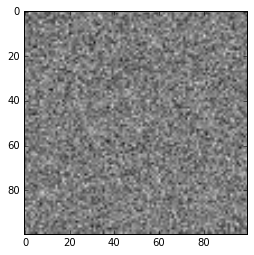

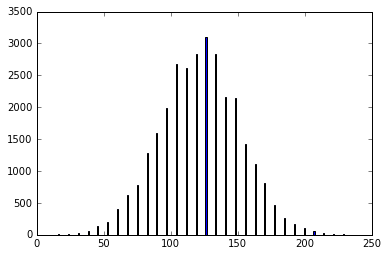

In [9]:
# グレー画像のヒストグラムを計算しなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np


import importlib
importlib.import_module('cv2')

img = cv2.imread("test2.bmp")

plt.imshow(img)

hist, bins = np.histogram( img, 30  )

plt.figure()
plt.bar( bins[:-1], hist )
plt.show()

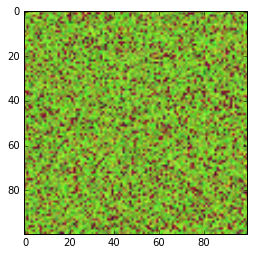

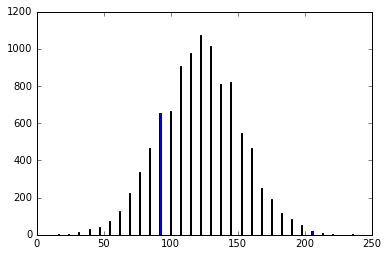

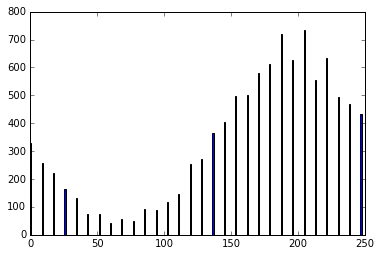

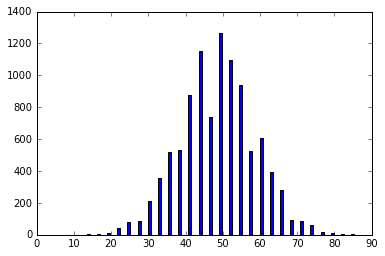

In [10]:
# カラー画像の各チャンネルのヒストグラムを計算しなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test3.bmp")

plt.imshow(img)

hist, bins = np.histogram( img[:,:,0], 30  )
plt.figure()
plt.bar( bins[:-1], hist )

hist, bins = np.histogram( img[:,:,1], 30  )
plt.figure()
plt.bar( bins[:-1], hist )

hist, bins = np.histogram( img[:,:,2], 30  )
plt.figure()
plt.bar( bins[:-1], hist )

plt.show()

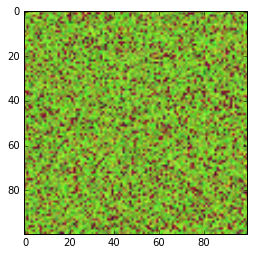

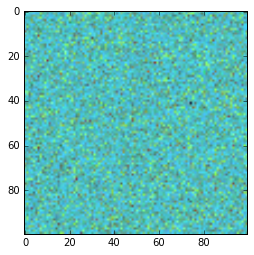

In [11]:
# BGRからHSVへ画像の色空間を変換しなさい
import cv2
import matplotlib.pyplot as plt

bgr = cv2.imread("test3.bmp")
hsv = cv2.cvtColor( img, cv2.COLOR_BGR2HSV )

plt.imshow(bgr)

plt.figure()
plt.imshow( hsv )
plt.show()

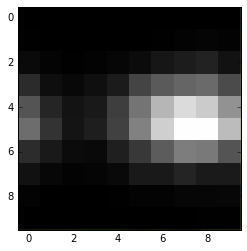

In [12]:
# RとGチャンネルの二次元ヒストグラムを作成し，濃淡画像として表示しなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test3.bmp")

plt.imshow(img)

hist, bins1, bins2= np.histogram2d( img[:,:,1].flatten(), img[:,:,2].flatten(), bins=(10, 10))
plt.imshow(hist.T, interpolation="None", cmap="gray")
plt.show()

In [13]:
# マウスでクリックされた位置の画素値を取得しなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test3.bmp")

def mouse_event(event, x, y, flags, param):
    # 左クリックイベント
    if event == cv2.EVENT_LBUTTONDOWN:
        print x,y, "->", img[y, x]

cv2.namedWindow("image")
cv2.setMouseCallback("image", mouse_event)
cv2.imshow( "image", img )

cv2.waitKey(0)
cv2.destroyAllWindows()

82 33 -> [ 76 255  47]
44 45 -> [142 127  52]
42 74 -> [109 193  57]


In [14]:
# トラックバーで指定したRGB値の単色画像を生成しなさい
import cv2
import numpy as np

img = np.zeros((300,300,3), dtype=np.uint8)

def chage_value(val):
    r = cv2.getTrackbarPos("R", "image")
    g = cv2.getTrackbarPos("G", "image")
    b = cv2.getTrackbarPos("B", "image")
    img[:,:,0] = b
    img[:,:,1] = g
    img[:,:,2] = r
   
    cv2.imshow( "image", img )

cv2.namedWindow("image")
cv2.imshow("image", img)

cv2.createTrackbar("R", "image", 0, 255, chage_value)
cv2.createTrackbar("G", "image", 0, 255, chage_value)
cv2.createTrackbar("B", "image", 0, 255, chage_value)

cv2.setMouseCallback("image", mouse_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
# トラックバーで指定したHSV値の単色画像を生成しなさい
import cv2
import numpy as np

img = np.zeros((300,300,3), dtype=np.uint8)

def chage_value(val):
    global img
    h = cv2.getTrackbarPos("H", "image")
    s = cv2.getTrackbarPos("S", "image")
    v = cv2.getTrackbarPos("V", "image")
    img[:,:,0] = h
    img[:,:,1] = s
    img[:,:,2] = v
    
    hsv = cv2.cvtColor( img, cv2.COLOR_HSV2BGR ) 
   
    cv2.imshow( "image", hsv )

cv2.namedWindow("image")
cv2.imshow("image", img)

cv2.createTrackbar("H", "image", 0, 255, chage_value)
cv2.createTrackbar("S", "image", 0, 255, chage_value)
cv2.createTrackbar("V", "image", 0, 255, chage_value)

cv2.setMouseCallback("image", mouse_event)

cv2.waitKey(0)
cv2.destroyAllWindows()